In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.datasets import fetch_openml

dow_jones = fetch_openml(name="Dow-Jones-Industrial-Average-Dataset", version=1, as_frame=True)
# Only keep the first 2500 rows
data = dow_jones.data.loc[:2499].copy()
data.tail()

,Date,Price,Open,High,Low,Vol.,Change_%
2495,"Feb 01, 2010","10,185.53","10,068.99","10,227.24","10,068.99",-,1.17
2496,"Jan 29, 2010","10,067.33","10,122.04","10,272.29","10,014.35",-,-0.52
2497,"Jan 28, 2010","10,120.46","10,236.92","10,310.68","10,023.80",-,-1.13
2498,"Jan 27, 2010","10,236.16","10,194.29","10,294.13","10,060.98",-,0.41
2499,"Jan 26, 2010","10,194.29","10,195.35","10,323.00","10,102.17",-,-0.03


In [134]:
data.shape[0]

2500

In [135]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.sort_index(inplace=True)
data["Open"] = data["Open"].str.replace(",", "").astype(float)
data["Price"] = data["Price"].str.replace(",", "").astype(float)
price = data["Price"]

In [150]:
# Expanding window (the default)
tscv = TimeSeriesSplit(n_splits=5)
tscv = TimeSeriesSplit(n_splits=5, gap=30)
tscv = TimeSeriesSplit(n_splits=5, test_size=100)
tscv = TimeSeriesSplit(n_splits=5, test_size=100, gap=30)
tscv

TimeSeriesSplit(gap=30, max_train_size=500, n_splits=4, test_size=100)

In [ ]:
# Sliding window
# tscv = TimeSeriesSplit(n_splits=4, max_train_size=500)
# tscv = TimeSeriesSplit(n_splits=4, max_train_size=500, gap=30)
# tscv = TimeSeriesSplit(n_splits=4, max_train_size=500, test_size=100)
# tscv = TimeSeriesSplit(n_splits=4, max_train_size=500, test_size=100, gap=30)
# tscv

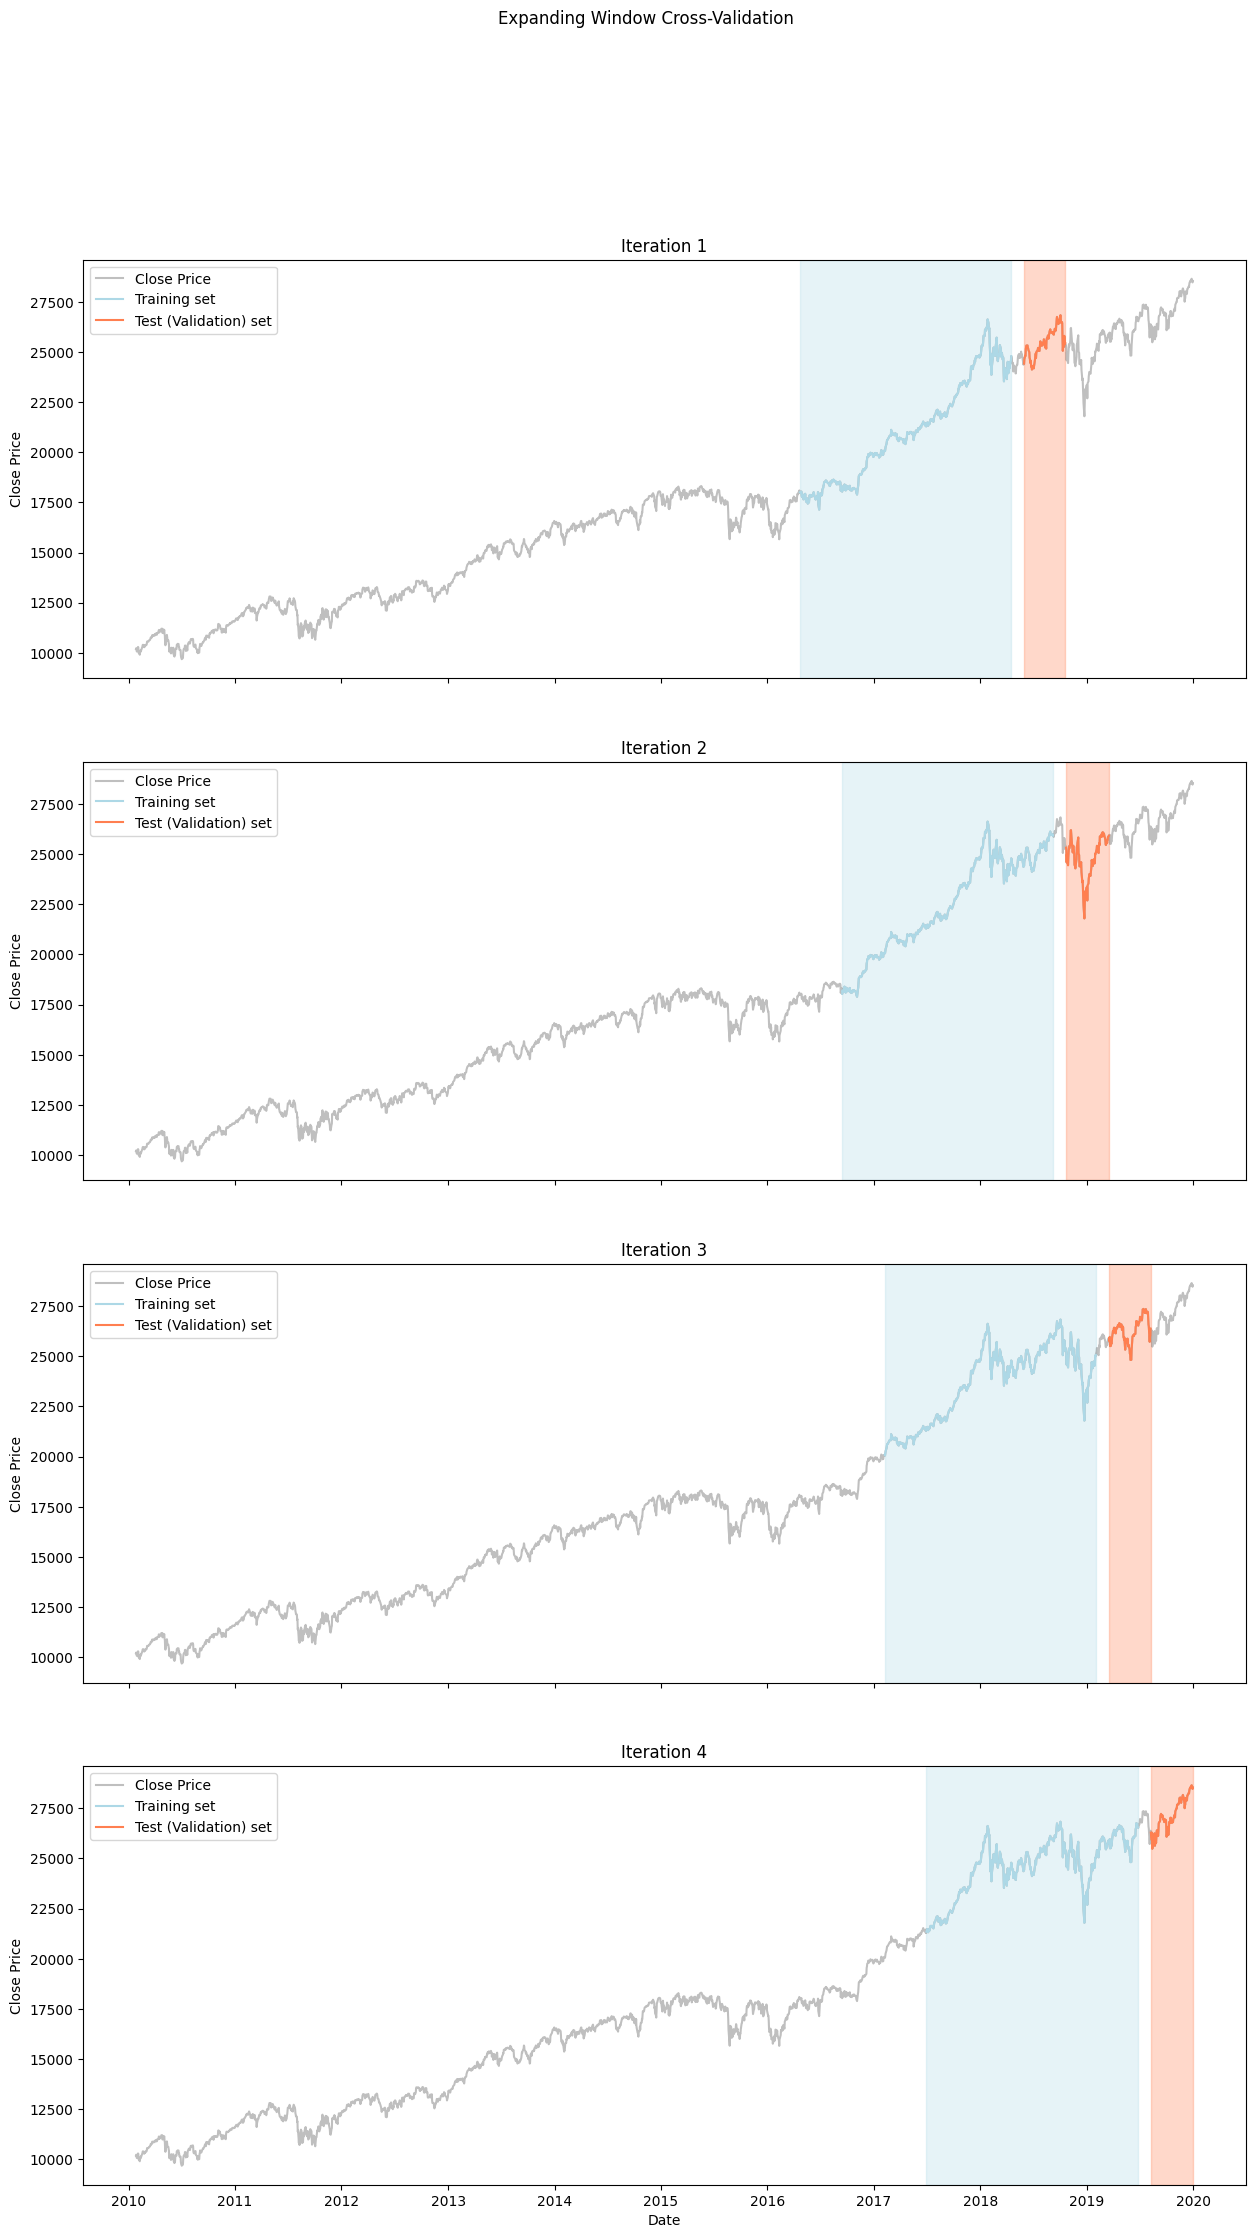

In [151]:
# Visualize
fig, axs = plt.subplots(4, 1, figsize=(15, 25), sharex=True)
fig.suptitle("Time-Based Cross-Validation")

train_color = "lightblue"
test_color = "coral"

for i, (train_index, test_index) in enumerate(tscv.split(price)):
    train_data = price.iloc[train_index]
    test_data = price.iloc[test_index]

    ax = axs[i]

    ax.plot(price.index, price.values, label="Close Price", color="gray", alpha=0.5)
    ax.plot(train_data.index, train_data.values, color=train_color, label="Training set")
    ax.plot(test_data.index, test_data.values, color=test_color, label="Test (Validation) set")
    ax.axvspan(test_data.index[0], test_data.index[-1], color=test_color, alpha=0.3)
    ax.axvspan(train_data.index[0], train_data.index[-1], color=train_color, alpha=0.3)

    ax.set_title(f"Iteration {i+1}")
    ax.set_ylabel("Close Price")
    ax.legend(loc="upper left")

axs[-1].set_xlabel("Date")

plt.show()

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Features and target variable
X_train = data[["Open"]]
y_train = data["Price"]

tscv = TimeSeriesSplit(n_splits=5)

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=tscv)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.98399663 0.98257506 0.94965023 0.99533959 0.97456766]
Mean cross-validation score: 0.9772258339161493
